# KNN and Logistic Regression to Predict Heart Diseases

According to the CDC, heart disease is one of the leading causes of death for people in the US. About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare.

For this project, I'll load the heart disease dataset (available on https://www.kaggle.com/code/andls555/heart-disease-prediction/data) and use this data to train and test 1) a logistic regression classifier, and then 2) a KNN classifier using the scikit-learn classes, LogisticRegression and KNeighborsClassifier respectively. Subsequently, I'll then compare and contrast the results using classifier evaluation methods in sklearn.metrics.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data=pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.shape

(319795, 18)

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# remove outliers

In [ ]:
min_thresold, max_thresold = data.BMI.quantile([0.001, 0.95])
min_thresold, max_thresold

(15.07, 40.18)

In [ ]:
data[data.BMI>max_thresold].shape

(15900, 18)

In [ ]:
max_thresoldS = data.SleepTime.quantile( 0.9997)
max_thresoldS

20.0

In [ ]:
data[data.SleepTime>max_thresoldS].shape

(44, 18)

In [ ]:
data=data[(data.SleepTime < max_thresoldS)&(data.BMI >min_thresold)&(data.BMI <max_thresold)]

data.shape

(303282, 18)

# Remove duplicated

In [ ]:

data.duplicated().sum()


18048

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285234 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      285234 non-null  object 
 1   BMI               285234 non-null  float64
 2   Smoking           285234 non-null  object 
 3   AlcoholDrinking   285234 non-null  object 
 4   Stroke            285234 non-null  object 
 5   PhysicalHealth    285234 non-null  float64
 6   MentalHealth      285234 non-null  float64
 7   DiffWalking       285234 non-null  object 
 8   Sex               285234 non-null  object 
 9   AgeCategory       285234 non-null  object 
 10  Race              285234 non-null  object 
 11  Diabetic          285234 non-null  object 
 12  PhysicalActivity  285234 non-null  object 
 13  GenHealth         285234 non-null  object 
 14  SleepTime         285234 non-null  float64
 15  Asthma            285234 non-null  object 
 16  KidneyDisease     28

In [ ]:
data['Diabetic'].value_counts()

No                         240826
Yes                         35881
No, borderline diabetes      6162
Yes (during pregnancy)       2365
Name: Diabetic, dtype: int64

In [ ]:
data=data.replace("No",0)
data=data.replace("Yes",1)
data=data.replace("Male",0)
data=data.replace("Female",1)
data=data.replace("No, borderline diabetes",0)
data=data.replace("Yes (during pregnancy)",1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285234 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      285234 non-null  int64  
 1   BMI               285234 non-null  float64
 2   Smoking           285234 non-null  int64  
 3   AlcoholDrinking   285234 non-null  int64  
 4   Stroke            285234 non-null  int64  
 5   PhysicalHealth    285234 non-null  float64
 6   MentalHealth      285234 non-null  float64
 7   DiffWalking       285234 non-null  int64  
 8   Sex               285234 non-null  int64  
 9   AgeCategory       285234 non-null  object 
 10  Race              285234 non-null  object 
 11  Diabetic          285234 non-null  int64  
 12  PhysicalActivity  285234 non-null  int64  
 13  GenHealth         285234 non-null  object 
 14  SleepTime         285234 non-null  float64
 15  Asthma            285234 non-null  int64  
 16  KidneyDisease     28

# categorical features

In [ ]:
data['AgeCategory'].value_counts()

65-69          29950
60-64          29379
70-74          28089
55-59          25806
80 or older    23014
50-54          22002
75-79          20111
18-24          19352
45-49          18929
40-44          18330
35-39          18132
30-34          16776
25-29          15364
Name: AgeCategory, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '55-59'),
  Text(1, 0, '80 or older'),
  Text(2, 0, '65-69'),
  Text(3, 0, '75-79'),
  Text(4, 0, '40-44'),
  Text(5, 0, '70-74'),
  Text(6, 0, '60-64'),
  Text(7, 0, '50-54'),
  Text(8, 0, '45-49'),
  Text(9, 0, '18-24'),
  Text(10, 0, '35-39'),
  Text(11, 0, '25-29'),
  Text(12, 0, '30-34')])

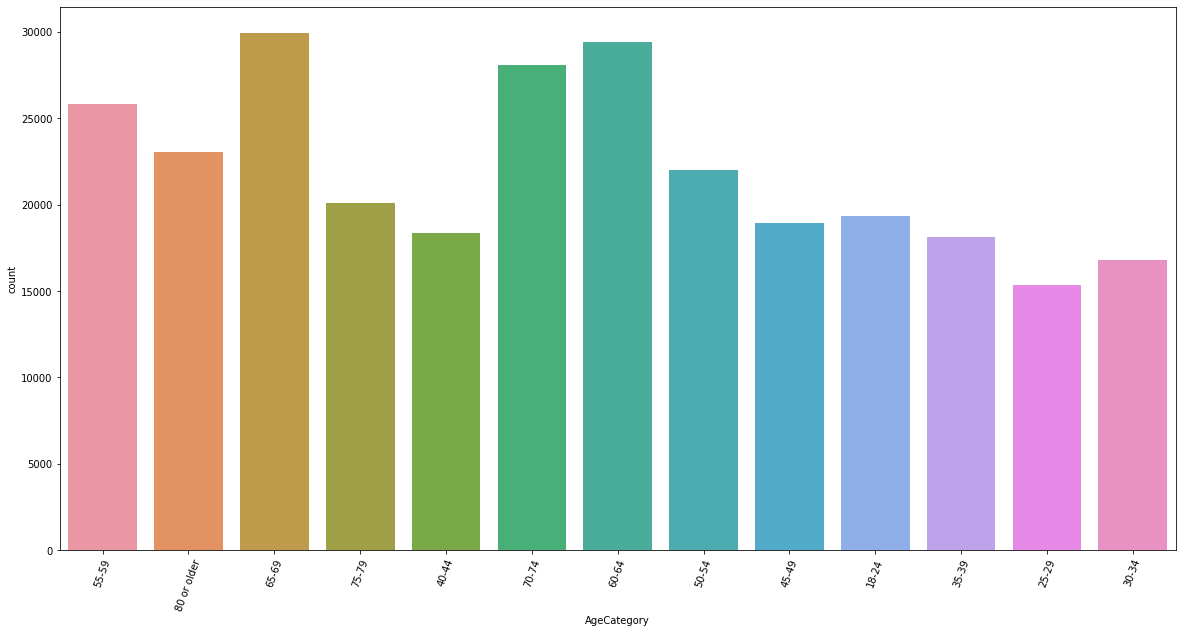

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='AgeCategory',data=data)
plt.xticks(rotation=70)

In [ ]:
data['GenHealth'].value_counts()

Very good    101375
Good          84707
Excellent     58670
Fair          30661
Poor           9821
Name: GenHealth, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very good'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Poor'),
  Text(4, 0, 'Excellent')])

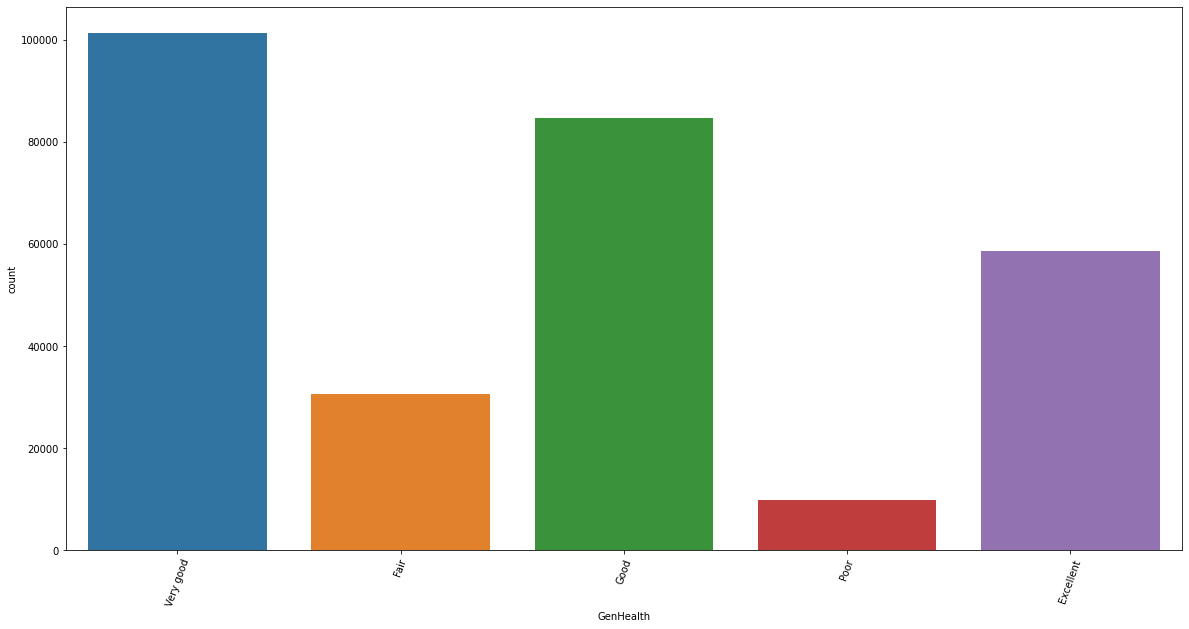

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='GenHealth',data=data)
plt.xticks(rotation=70)

In [ ]:
from category_encoders import TargetEncoder
Encoder=TargetEncoder()
Encoder.fit(X=data['GenHealth'],y=data['HeartDisease'])
data['GenHealth'] = Encoder.transform(X=data['GenHealth'],y=data['HeartDisease'])
Encoder1=TargetEncoder()
Encoder1.fit(X=data['AgeCategory'],y=data['HeartDisease'])
data['AgeCategory'] = Encoder1.transform(X=data['AgeCategory'],y=data['HeartDisease'])
Encoder2=TargetEncoder()
Encoder2.fit(X=data['Race'],y=data['HeartDisease'])
data['Race'] = Encoder2.transform(X=data['Race'],y=data['HeartDisease'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285234 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      285234 non-null  int64  
 1   BMI               285234 non-null  float64
 2   Smoking           285234 non-null  int64  
 3   AlcoholDrinking   285234 non-null  int64  
 4   Stroke            285234 non-null  int64  
 5   PhysicalHealth    285234 non-null  float64
 6   MentalHealth      285234 non-null  float64
 7   DiffWalking       285234 non-null  int64  
 8   Sex               285234 non-null  int64  
 9   AgeCategory       285234 non-null  float64
 10  Race              285234 non-null  float64
 11  Diabetic          285234 non-null  int64  
 12  PhysicalActivity  285234 non-null  int64  
 13  GenHealth         285234 non-null  float64
 14  SleepTime         285234 non-null  float64
 15  Asthma            285234 non-null  int64  
 16  KidneyDisease     28

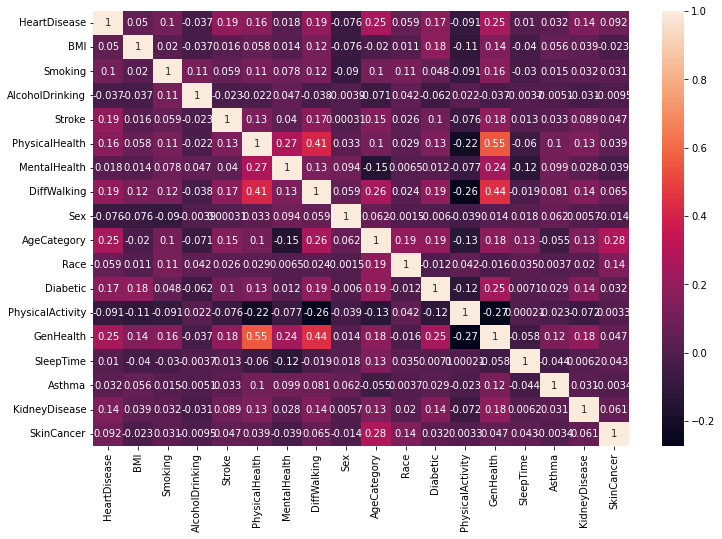

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
top_feature = corr.index
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# Normalize data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data)
rescaledX = scaler.transform(data)

#  Handle Imbalanced data
reference:https://www.youtube.com/watch?v=JnlM4yLFNuo&t=993s

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

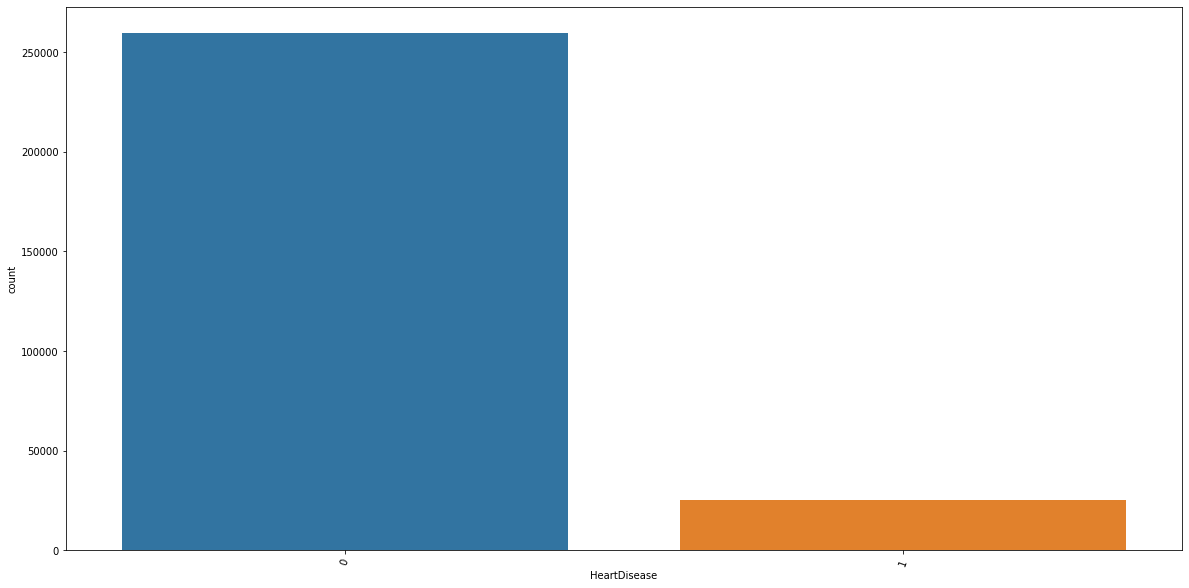

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='HeartDisease',data=data)
plt.xticks(rotation=70)

# Oversampling

In [ ]:
# Class count
count_class_0, count_class_1 = data.HeartDisease.value_counts()

# Divide by class
class_0 = data[data['HeartDisease'] == 0]
class_1 = data[data['HeartDisease'] == 1]
print(class_0.shape)
print(class_1.shape)

(259814, 18)
(25420, 18)


In [ ]:
class_1=class_1.sample(count_class_0,replace=True)
data = pd.concat([class_0, class_1], axis=0)
print(data.HeartDisease.value_counts())


0    259814
1    259814
Name: HeartDisease, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
y=data['HeartDisease']#lable
X=data.drop('HeartDisease',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import metrics
cls =LogisticRegression()
cls.fit(X_train,Y_train)
prediction = cls.predict((X_test))
print('Mean Square Error testing model 1 ', metrics.mean_squared_error(Y_test, prediction))
print("Classification Report: \n", classification_report(Y_test, prediction))


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Mean Square Error testing model 1  0.246136674172007
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76     51963
           1       0.76      0.75      0.75     51963

    accuracy                           0.75    103926
   macro avg       0.75      0.75      0.75    103926
weighted avg       0.75      0.75      0.75    103926



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import metrics
cls = KNeighborsClassifier(n_neighbors=5)
cls.fit(X_train,Y_train)
prediction = cls.predict((X_test))
print('Mean Square Error testing model 1 ', metrics.mean_squared_error(Y_test, prediction))
print("Classification Report: \n", classification_report(Y_test, prediction))


Mean Square Error testing model 1  0.1092027019225218
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     51963
           1       0.83      0.99      0.90     51963

    accuracy                           0.89    103926
   macro avg       0.91      0.89      0.89    103926
weighted avg       0.91      0.89      0.89    103926

